In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('fake-news/train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
x= df.loc[:,['label']] #took label out 
[df.iloc[0:1,3:4]]

[                                                text
 0  House Dem Aide: We Didn’t Even See Comey’s Let...]

In [5]:
x.head()

,label
0,1
1,0
2,1
3,1
4,1


In [6]:
y = df.iloc[:,:3] #took features into one variable

In [7]:
y.head()

,id,title,author
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn
2,2,Why the Truth Might Get You Fired,Consortiumnews.com
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy


In [8]:
df.shape

(20800, 5)

In [9]:
df= df.dropna()

In [10]:
df.shape

(18285, 5)

In [11]:
sentences = df.copy()

In [12]:
sentences.reset_index(inplace=True)

In [13]:
sentences.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [14]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [15]:
ps = PorterStemmer()

In [16]:

corpus=[]
#corpus meansa col lection of written text
#especially the entire works of a particular author or a body of writing on a particular subject
#we gonna  store all 

In [17]:
import re
for i in range (0,len(sentences)):
    review = re.sub('[^a-zA-Z]',' ',sentences['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word)for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
    
   

In [18]:
corpus[:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [19]:
#now we gotta apply COuntVectorizer

#createing the bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
print(cv)
#NGrams are basically a set of co-occurring words within a given window and when computing the n-grams
#you typically move one word forward (although you can move X words forward in more advanced scenarios)
X =cv.fit_transform(corpus).toarray()

CountVectorizer(max_features=5000, ngram_range=(1, 3))


In [20]:
X.shape

(18285, 5000)

In [21]:
Y=sentences['label']

In [22]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [23]:
#now we start model building
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=0)

In [24]:
cv.get_feature_names()[:10]

C:\Users\dhanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut']

In [25]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [26]:
#here is what countvectorizer does 
countvect=pd.DataFrame(X_train,columns=cv.get_feature_names())
countvect.head(5)

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#model Multinomial naive bayes algorithm

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
classifier= MultinomialNB()

In [29]:
classifier.fit(X_train,Y_train)

MultinomialNB()

In [35]:

pred = classifier.predict(X_test)
pred
pred.shape


(3657,)

In [31]:
from sklearn import metrics

In [32]:
score = metrics.accuracy_score(Y_test,pred)

In [33]:
score

0.9015586546349467

In [34]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
cm=metrics.confusion_matrix(Y_test,pred)


In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization') 

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1823  217]
 [ 143 1474]]


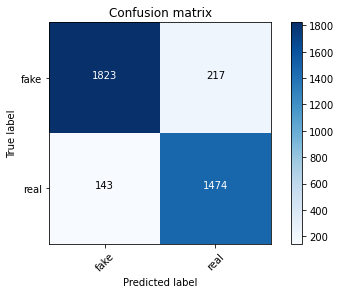

In [36]:
plot_confusion_matrix(cm,classes = ['fake','real'])


In [37]:
# classifier with hyperparatmeter


In [38]:
classifier =MultinomialNB(alpha=0.1)

In [39]:
score_checks=0 
for alpha in np.arange(0,1,0.1):
    test_classifier= MultinomialNB(alpha=alpha)
    test_classifier.fit(X_train,Y_train)
    Y_pred=test_classifier.predict(X_test)
    score=metrics.accuracy_score(Y_test,Y_pred)
    if score>score_checks:
        classifier=test_classifier
    print('alpha :'+str(alpha)+'score: '+str(score))

C:\Users\dhanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


alpha :0.0score: 0.8955427946404156
alpha :0.1score: 0.9051134809953514
alpha :0.2score: 0.9051134809953514
alpha :0.30000000000000004score: 0.9059338255400602
alpha :0.4score: 0.9051134809953514
alpha :0.5score: 0.9042931364506426
alpha :0.6000000000000001score: 0.9037462400875034
alpha :0.7000000000000001score: 0.9026524473612251
alpha :0.8score: 0.9021055509980859
alpha :0.9score: 0.9015586546349467


In [40]:
import pickle

In [41]:
pickle.dump(classifier,open('model.pkl','wb'))
pickle.dump(cv,open('transform.pkl','wb'))

In [42]:
pickle.dump(ps,open('portstem.pkl','wb'))